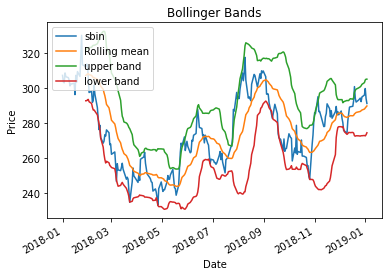

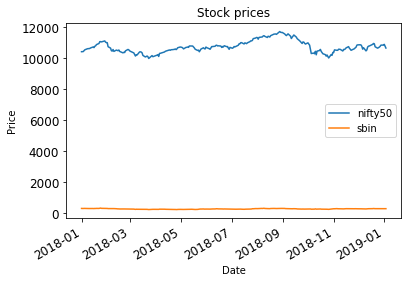

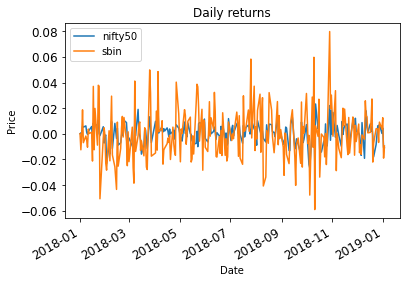

Mean:  -1.5726263748856243e-05 Standard Deviation: 0.020047296853354754


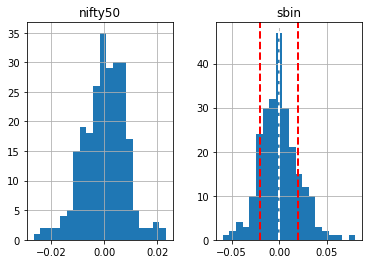

Kurtosis values(+ve means FAT Tails and -ve means lighter tails):  nifty50    0.644704
sbin       1.063395
dtype: float64
beta_sbin =  1.4088275656472926
alpha_sbin =  -0.00018871175192922628


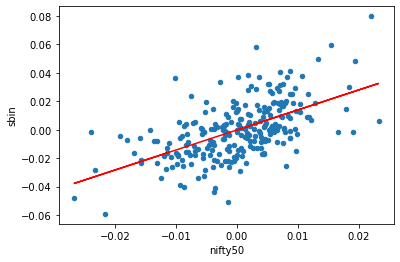

---Correlation of Nifty50 ------
          nifty50      sbin
nifty50  1.000000  0.569102
sbin     0.569102  1.000000


In [3]:
#*** Stock price data analysis

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def plot_selected(df, columns, start_date, end_date):
    """ Plot the desired columns over index values in the given range.abs"""
    plot_data(df.loc[start_date: end_date, columns], title="Selected data")


def symbol_to_path(symbol, bas_dir="~Deepak/data"):
    """ Return CSV file path given ticker symbol."""
    return os.path.join(bas_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'sbin' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'sbin')

    for symbol in symbols:
        # TODO: Read a.nd join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col="Date",
                              parse_dates=True, usecols=['Date', 'Close'],
                              na_values=['nan'])

        # Rename to prevent clash
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)  # use default how ='left'
        if(symbol == 'sbin'):  # drop dates sbin did not trade
            df = df.dropna(subset=["sbin"])

    return df




def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window).mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values,"""
    return (values.rolling(window).std())


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper_band = rm + rstd * 2
    lower_band = rm - rstd * 2
    return upper_band, lower_band


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = (df/df.shift(1))-1
    daily_returns.iloc[0, :] = 0  # Padas leave the 0th row full of NaNs
    return daily_returns


def Bollinger_band(df, window=20):
    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_kotak = get_rolling_mean(df, window=20)

    # 2. Compute rolling standard deviation
    rstd_kotak = get_rolling_std(df, window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_kotak, rstd_kotak)

    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df.plot(title="Bollinger Bands", label='sbin')
    rm_kotak.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()


def test_run():
    # Read data
    start_date = "2018-01-01"
    end_date = "2019-12-31"
    dates = pd.date_range(start_date, end_date)
    symbols = ['nifty50', 'sbin', ]
    df = get_data(symbols, dates)

    # Compute Bollinger Bands
    Bollinger_band(df['sbin'])

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(df)
    plot_data(daily_returns, title="Daily returns")
    daily_returns.hist(bins=20)  # Histogram of daily return

    # Get mean and standard deviation
    mean = daily_returns['sbin'].mean()
    std = daily_returns['sbin'].std()
    print("Mean: ", mean, "Standard Deviation:", std)
    # Get the mean line on the histogram chart
    plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
    # Get the std line on the histogram chart
    plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
    # Get the std line on the histogram chart
    plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
    plt.show()

    # Compute kurtosis
    print("Kurtosis values(+ve means FAT Tails and -ve means lighter tails): ",
          daily_returns.kurtosis())

    # Scatterplot kotak vs sbi
    daily_returns.plot(kind='scatter', x='nifty50', y='sbin')
    beta_sbin, alpha_sbin = np.polyfit(
        daily_returns['nifty50'], daily_returns['sbin'], 1)
    print("beta_sbin = ", beta_sbin)
    print("alpha_sbin = ", alpha_sbin)
    plt.plot(daily_returns['nifty50'], beta_sbin *
             daily_returns['nifty50'] + alpha_sbin, '-', color='r')  # mx +b
    plt.show()

    # Calculate correlation coefficient
    print("---Correlation of Nifty50 ------")
    print(daily_returns.corr(method='pearson'))


if __name__ == "__main__":
    test_run()
